In [59]:
# Import packages.
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sns
from sympy import symbols, Eq, solve
from sympy import Matrix

In [60]:
# Load the .mat file.
mat_contents=sio.loadmat('./singlerun_ei_ii_iSTDP_equal_eta.mat')
c = mat_contents['c'].squeeze()
Cee_distribution_equal = mat_contents['Cee_distribution']
Cei_distribution_equal = mat_contents['Cei_distribution']
Cii_distribution_equal = mat_contents['Cii_distribution']
dt = mat_contents['dt'].squeeze()
dtRate = mat_contents['dtRate'].squeeze()
eRateT_equal = mat_contents['eRateT'].squeeze()
iRateT_equal = mat_contents['iRateT'].squeeze()
eta_ei_equal = mat_contents['eta_ei'].squeeze()
eta_ii_equal = eta_ei_equal
Ie_current_equal = np.mean(mat_contents['IeRec'],axis=0)
Ii_current_equal = np.mean(mat_contents['IiRec'],axis=0)
Ix_current_equal = np.mean(mat_contents['IxRec'],axis=0)
Jm = mat_contents['Jm']
Jxm = mat_contents['Jxm']
JRec_ei_equal = mat_contents['JRec_ei']
JRec_ii_equal = mat_contents['JRec_ii']
mean_J_ei_equal = np.mean(JRec_ei_equal,axis=0)
mean_J_ii_equal = np.mean(JRec_ii_equal,axis=0)
N = mat_contents['N'].squeeze()
Ree_distribution_equal = mat_contents['Ree_distribution']
Rei_distribution_equal = mat_contents['Rei_distribution']
Rii_distribution_equal = mat_contents['Rii_distribution']
reSim_equal = mat_contents['reSim']
riSim_equal = mat_contents['riSim']
rx = mat_contents['rx'].squeeze()
seed = mat_contents['seed'].squeeze()
T = mat_contents['T'].squeeze()
T1 = mat_contents['T1'].squeeze()
T2 = mat_contents['T2'].squeeze()
tauSTDP = mat_contents['tauSTDP'].squeeze()
Tburn = mat_contents['Tburn']
Var_e_distribution_equal = mat_contents['Var_e_distribution']
Var_i_distribution_equal = mat_contents['Var_i_distribution']
W = mat_contents['W']
winsize = mat_contents['winsize'].squeeze()
Wx = mat_contents['Wx']
Jmax_ei_equal = mat_contents['Jmax_ei'].squeeze() *np.sqrt(N)
Jmax_ii_equal = mat_contents['Jmax_ii'].squeeze() *np.sqrt(N)

# Load the .mat file.
mat_contents=sio.loadmat('./singlerun_ei_ii_iSTDP_slow_ei.mat')
Cee_distribution_slow_ei = mat_contents['Cee_distribution']
Cei_distribution_slow_ei = mat_contents['Cei_distribution']
Cii_distribution_slow_ei = mat_contents['Cii_distribution']
eRateT_slow_ei = mat_contents['eRateT'].squeeze()
iRateT_slow_ei = mat_contents['iRateT'].squeeze()
eta_ei_slow_ei = mat_contents['eta_ei'].squeeze()
eta_ii_slow_ei = eta_ei_slow_ei * 10
Ie_current_slow_ei = np.mean(mat_contents['IeRec'],axis=0)
Ii_current_slow_ei = np.mean(mat_contents['IiRec'],axis=0)
Ix_current_slow_ei = np.mean(mat_contents['IxRec'],axis=0)
JRec_ei_slow_ei = mat_contents['JRec_ei']
JRec_ii_slow_ei = mat_contents['JRec_ii']
mean_J_ei_slow_ei = np.mean(JRec_ei_slow_ei,axis=0)
mean_J_ii_slow_ei = np.mean(JRec_ii_slow_ei,axis=0)
Ree_distribution_slow_ei = mat_contents['Ree_distribution']
Rei_distribution_slow_ei = mat_contents['Rei_distribution']
Rii_distribution_slow_ei = mat_contents['Rii_distribution']
reSim_slow_ei = mat_contents['reSim']
riSim_slow_ei = mat_contents['riSim']
Var_e_distribution_slow_ei = mat_contents['Var_e_distribution']
Var_i_distribution_slow_ei = mat_contents['Var_i_distribution']
Jmax_ei_slow_ei = mat_contents['Jmax_ei'].squeeze() *np.sqrt(N)
Jmax_ii_slow_ei = mat_contents['Jmax_ii'].squeeze() *np.sqrt(N)

# Load the .mat file.
mat_contents=sio.loadmat('./singlerun_ei_ii_iSTDP_slow_ii.mat')
Cee_distribution_slow_ii = mat_contents['Cee_distribution']
Cei_distribution_slow_ii = mat_contents['Cei_distribution']
Cii_distribution_slow_ii = mat_contents['Cii_distribution']
eRateT_slow_ii = mat_contents['eRateT'].squeeze()
iRateT_slow_ii = mat_contents['iRateT'].squeeze()
eta_ei_slow_ii = mat_contents['eta_ei'].squeeze()
eta_ii_slow_ii = eta_ei_slow_ii/10
Ie_current_slow_ii = np.mean(mat_contents['IeRec'],axis=0)
Ii_current_slow_ii = np.mean(mat_contents['IiRec'],axis=0)
Ix_current_slow_ii = np.mean(mat_contents['IxRec'],axis=0)
JRec_ei_slow_ii = mat_contents['JRec_ei']
JRec_ii_slow_ii = mat_contents['JRec_ii']
mean_J_ei_slow_ii = np.nanmean(JRec_ei_slow_ii,axis=0)
mean_J_ii_slow_ii = np.nanmean(JRec_ii_slow_ii,axis=0)
Ree_distribution_slow_ii = mat_contents['Ree_distribution']
Rei_distribution_slow_ii = mat_contents['Rei_distribution']
Rii_distribution_slow_ii = mat_contents['Rii_distribution']
reSim_slow_ii = mat_contents['reSim']
riSim_slow_ii = mat_contents['riSim']
Var_e_distribution_slow_ii = mat_contents['Var_e_distribution']
Var_i_distribution_slow_ii = mat_contents['Var_i_distribution']
Jmax_ei_slow_ii = mat_contents['Jmax_ei'].squeeze() *np.sqrt(N)
Jmax_ii_slow_ii = mat_contents['Jmax_ii'].squeeze() *np.sqrt(N)


time_axis = np.linspace(0,T/1000,len(JRec_ei_equal[0,:]))

In [61]:
# Some details of this simulation:
print('N =',N)
print('c =',c)
print('eta_ei_equal =',eta_ei_equal*Jmax_ei_equal/np.sqrt(N))
print('eta_ii_equal =',eta_ii_equal*Jmax_ii_equal/np.sqrt(N))
print('eta_ei_slow_ei =',eta_ei_slow_ei*Jmax_ei_slow_ei/np.sqrt(N))
print('eta_ii_slow_ei =',eta_ii_slow_ei*Jmax_ii_slow_ei/np.sqrt(N))
print('eta_ei_slow_ii =',eta_ei_slow_ii*Jmax_ei_slow_ii/np.sqrt(N))
print('eta_ii_slow_ii =',eta_ii_slow_ii*Jmax_ii_slow_ii/np.sqrt(N))


N = 5000
c = 0
eta_ei_equal = 0.0001
eta_ii_equal = 0.0001
eta_ei_slow_ei = 0.0001
eta_ii_slow_ei = 0.001
eta_ei_slow_ii = 0.001
eta_ii_slow_ii = 0.0001


In [62]:
# We want distributions of rates, covs, vars, corrs, weights, and a raster. 
# And plot of E,I,X currents

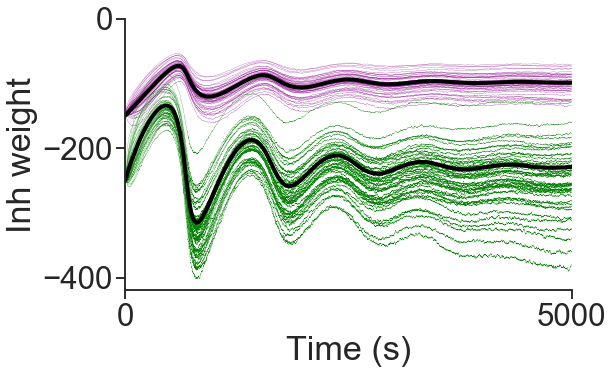

In [122]:
# Plot mean EI weight over time.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":0.2})

for i in range(50):
    plt.plot(time_axis,JRec_ei_equal[i,:]*np.sqrt(N),color='darkmagenta')
    plt.plot(time_axis,JRec_ii_equal[i,:]*np.sqrt(N),color='green')
# i=0
# plt.plot(time_axis,JRec_ei[i,:]*np.sqrt(N))

plt.plot(time_axis,mean_J_ei_equal*np.sqrt(N),color='black',linewidth=4,label='mean')
plt.plot(time_axis,mean_J_ii_equal*np.sqrt(N),color='black',linewidth=4,label='mean')

plt.xlabel(r'Time (s)')
plt.ylabel(r'Inh weight')

plt.xlim((0,T/1000))

plt.xticks((0,T/1000))
plt.yticks((-400,-200,0))

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig12-ei_ii_analysis/weight_evolution_equal_eta.pdf", bbox_inches="tight")


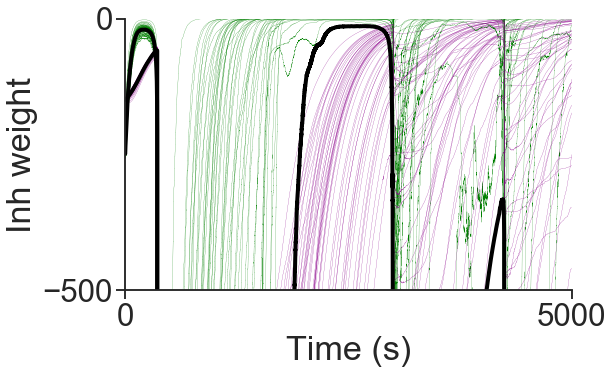

In [135]:
# Plot mean EI weight over time.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":0.2})

for i in range(50):
    plt.plot(time_axis,JRec_ei_slow_ei[i,:]*np.sqrt(N),color='darkmagenta')
    plt.plot(time_axis,JRec_ii_slow_ei[i,:]*np.sqrt(N),color='green')
# i=0
# plt.plot(time_axis,JRec_ei[i,:]*np.sqrt(N))

plt.plot(time_axis,mean_J_ei_slow_ei*np.sqrt(N),color='black',linewidth=4,label='mean')
plt.plot(time_axis,mean_J_ii_slow_ei*np.sqrt(N),color='black',linewidth=4,label='mean')

plt.xlabel(r'Time (s)')
plt.ylabel(r'Inh weight')

plt.xlim((0,T/1000))

plt.xticks((0,T/1000))
plt.yticks((-500,0))
plt.ylim((-500,0))

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig12-ei_ii_analysis/weight_evolution_slow_ei_inset.pdf", bbox_inches="tight")



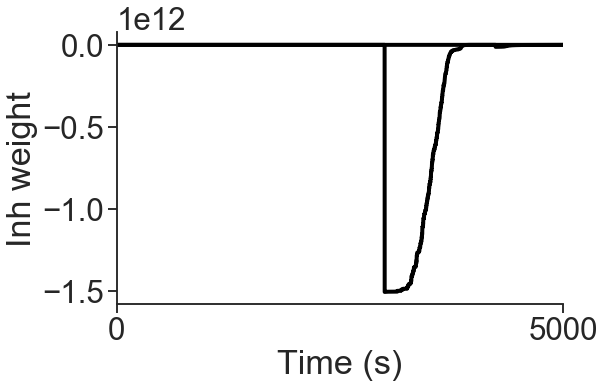

In [136]:
# Plot mean EI weight over time.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":0.2})

for i in range(50):
    plt.plot(time_axis,JRec_ei_slow_ei[i,:]*np.sqrt(N),color='darkmagenta')
    plt.plot(time_axis,JRec_ii_slow_ei[i,:]*np.sqrt(N),color='green')
# i=0
# plt.plot(time_axis,JRec_ei[i,:]*np.sqrt(N))

plt.plot(time_axis,mean_J_ei_slow_ei*np.sqrt(N),color='black',linewidth=4,label='mean')
plt.plot(time_axis,mean_J_ii_slow_ei*np.sqrt(N),color='black',linewidth=4,label='mean')

plt.xlabel(r'Time (s)')
plt.ylabel(r'Inh weight')

plt.xlim((0,T/1000))

plt.xticks((0,T/1000))
# plt.yticks((-500,0))
# plt.ylim((-500,0))

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig12-ei_ii_analysis/weight_evolution_slow_ei.pdf", bbox_inches="tight")



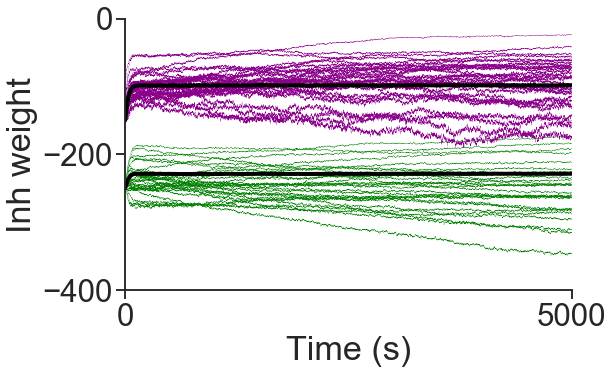

In [126]:
# Plot mean EI weight over time.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":0.2})

for i in range(30):
    plt.plot(time_axis,JRec_ei_slow_ii[i,:]*np.sqrt(N),color='darkmagenta')
    plt.plot(time_axis,JRec_ii_slow_ii[i,:]*np.sqrt(N),color='green')
# i=0
# plt.plot(time_axis,JRec_ei[i,:]*np.sqrt(N))

plt.plot(time_axis,mean_J_ei_slow_ii*np.sqrt(N),color='black',linewidth=4,label='mean')
plt.plot(time_axis,mean_J_ii_slow_ii*np.sqrt(N),color='black',linewidth=4,label='mean')

plt.xlabel(r'Time (s)')
plt.ylabel(r'Inh weight')

plt.xlim((0,T/1000))
plt.ylim((-400,0))

plt.xticks((0,T/1000))
plt.yticks((-400,-200,0))

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig12-ei_ii_analysis/weight_evolution_slow_ii.pdf", bbox_inches="tight")



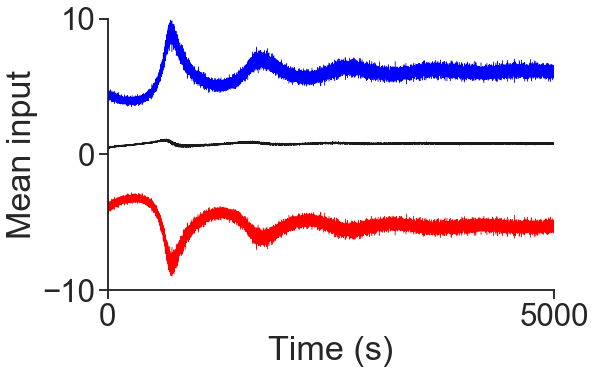

In [92]:
# Plot mean input over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":.43})

plt.plot(time_axis,Ie_current_equal+Ix_current_equal,color='blue')
plt.plot(time_axis,Ii_current_equal,color='red')
plt.plot(time_axis,Ie_current_equal+Ii_current_equal+Ix_current_equal,color='k')
    
plt.xlabel(r'Time (s)')
plt.ylabel(r'Mean input')

plt.ylim((-10,10))
plt.xlim((0,T/1000))

plt.xticks((0,T/1000))
plt.yticks((-10,0,10))
sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig12-ei_ii_analysis/input_equal_eta.pdf", bbox_inches="tight")



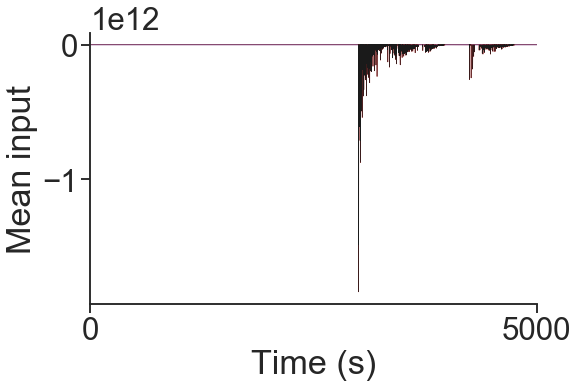

In [101]:
# Plot mean input over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":.43})

plt.plot(time_axis,Ie_current_slow_ei+Ix_current_slow_ei,color='blue')
plt.plot(time_axis,Ii_current_slow_ei,color='red')
plt.plot(time_axis,Ie_current_slow_ei+Ii_current_slow_ei+Ix_current_slow_ei,color='k')
    
plt.xlabel(r'Time (s)')
plt.ylabel(r'Mean input')

# plt.ylim((-100,10))
plt.xlim((0,T/1000))

plt.xticks((0,T/1000))
# plt.yticks((-10,0,10))
sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig12-ei_ii_analysis/input_slow_ei.pdf", bbox_inches="tight")



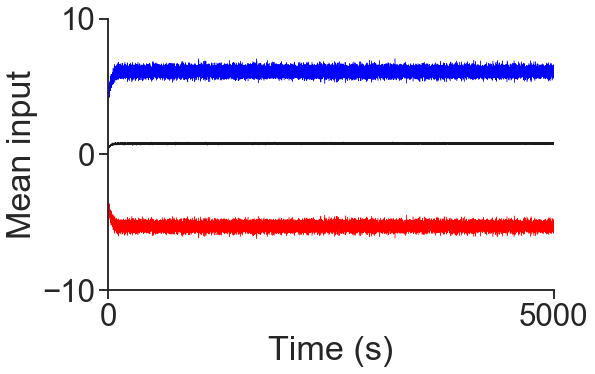

In [100]:
# Plot mean input over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":.43})

plt.plot(time_axis,Ie_current_slow_ii+Ix_current_slow_ii,color='blue')
plt.plot(time_axis,Ii_current_slow_ii,color='red')
plt.plot(time_axis,Ie_current_slow_ii+Ii_current_slow_ii+Ix_current_slow_ii,color='k')
    
plt.xlabel(r'Time (s)')
plt.ylabel(r'Mean input')

plt.ylim((-10,10))
plt.xlim((0-5,T/1000+5))

plt.xticks((0,T/1000))
plt.yticks((-10,0,10))
sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig12-ei_ii_analysis/input_slow_ii.pdf", bbox_inches="tight")



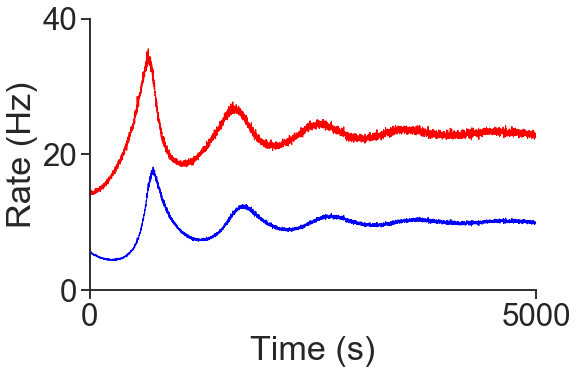

In [108]:
# Plot mean input over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":1.03})


plt.plot(1000*eRateT_equal[:-5],color='blue')
plt.plot(1000*iRateT_equal[:-5],color='red')

plt.xlabel(r'Time (s)')
plt.ylabel(r'Rate (Hz)')

plt.xticks((0,T/1000))

plt.xlim((0,T/1000))
plt.ylim((0,40))
plt.yticks((0,20,40))


sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig12-ei_ii_analysis/rates_equal_eta.pdf", bbox_inches="tight")




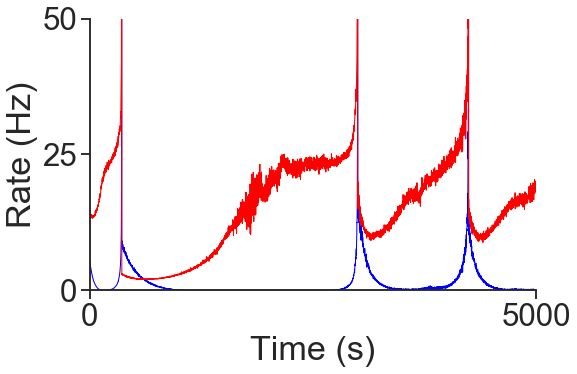

In [112]:
# Plot mean input over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":1.03})


plt.plot(1000*eRateT_slow_ei[:-5],color='blue')
plt.plot(1000*iRateT_slow_ei[:-5],color='red')

plt.xlabel(r'Time (s)')
plt.ylabel(r'Rate (Hz)')

plt.xticks((0,T/1000))

plt.xlim((0,T/1000))
plt.ylim(0,50)

plt.yticks((0,25,50))

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig12-ei_ii_analysis/rates_slow_ei.pdf", bbox_inches="tight")



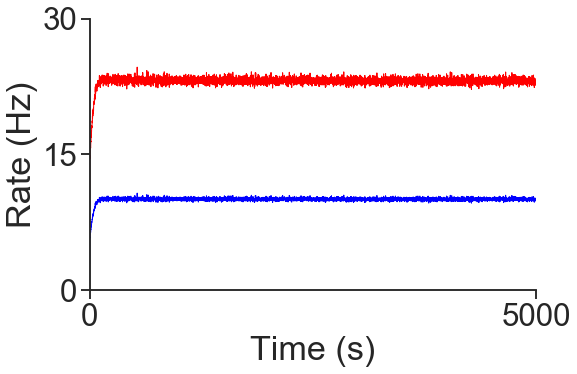

In [118]:
# Plot mean input over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":1.03})


plt.plot(1000*eRateT_slow_ii[:-5],color='blue')
plt.plot(1000*iRateT_slow_ii[:-5],color='red')

plt.xlabel(r'Time (s)')
plt.ylabel(r'Rate (Hz)')

plt.xticks((0,T/1000))
plt.ylim(0,30)

plt.yticks((0,15,30))
plt.xlim((0,T/1000))

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig12-ei_ii_analysis/rates_slow_ii.pdf", bbox_inches="tight")

